In [4]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Регрессионный анализ. Линейная,  полиномиальная регрессия.</b></h3>

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
 <li><b>Регрессия</b> - задача о предсказывании конкретного значения, но основе заданных параметров.</li>
 <li><b>Кластеризация</b>  - задача об объединении объектов в группы по каким-то уникальным общим свойствам/на основе каких-то закономерностях данных.</li>

</ul>
</div>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><li><a href="#1">Линейная регрессия.</a><ul><li><a href="#2">Метод максимального правдоподобия.</a></li><li><a href="#3">Практика. Регрессия "из коробки".</a></li></ul>
    <li><a href="#4">Полиномиальная регрессия.</a><ul></li><li><a href="#5">Практика на собственном датасете.</a></li></ul></font></p>

<h2>Линейная регрессия</h2>
<p id="1">Сегодня мы детально обсудим очень важный класс моделей машинного обучения – линейных. На данный момент развития машинного обучения и искусственного интелекта в целом можно строить довольно сложные модели, нейросети, но практически везде в основе лежат линейные модели. Они имеют большое кол-во преимуществ, например, такие как относительная простота вычислений и интепретация результатов, эффективность для описания многих процессов. Линейные модели используются в прогнозе цен, построении вероятностных моделей в кредитном скоринге, трейдинге, и т.д. </p>

Линейные модели описываются довольно простым линейным уравнением, где $y$ - целевая переменная, $w$ - вектор весов модели, $X$ - матрица наблюдений,  а $e$ - ошибка.$$y_i = \sum\limits^{m}_{j=1}w_j X_{ij} + e_i$$


<p style="align: center;"><img align=center src="https://wiki.loginom.ru/images/linear-regression.svg"  width=900></p>

<h3>Метод максимального правдоподобия</h3>
<p id="2">Если процесс описывается с помощью линеной модели, то необходимо определить параметры $\alpha$ модели, для максимально эффективной точности. На языке математики это означает, что нужно задать вероятность $p(y|x,\alpha)$ того, что модель с параметрами $\alpha$ и входными данными $x$ будет максимальной.</p>
Введем функцию правдоподобия, от которой нужно потребовать, чтобы произведение вероятностей по всем возможным $x$ с параметрами $\alpha$ было максимально.
$$W(\alpha) = \prod\limits_{i}p(x_i, \alpha)$$
Тогда прологарифмировав выражение, получаем функцию масимального правдоподобия. $$L(\alpha) = \sum\limits_i \log p(x_i,\alpha)$$
Чтобы максимизировать $L(\alpha)$ необходимо минимизировать среднеквадратичную ошибку между прогнозируемыми и фактическими значениями.
Подробное док-во и доп. информацию, можно почитать <a href="https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya">здесь</a>.

<div class="alert alert-info"><i>В каких случаях мы можем использовать линейную регресию? Какие данные мы можем использовать?</i>

Требования к данным.
<ol><li>Линейная зависимость целевой переменной</li><li>Нормальное распределение остатков</li><li>Постоянная изменчивость остатков. Гомоскедастиность.</li></ol>

</div>

<ol><b><li><b>Линейная зависимость целевой переменной</b></li></b> Линейная модель не сможет описвать сложные кривые и нелинейные данные. Должно быть хотя бы подозрение на линейность модели.<p style="align: center;"><img align=center src="https://sun9-35.userapi.com/impg/hP4Ue_r14n4_zs8d0UKA7LpZx74vPQDJy9Igqg/ve5O14Ggors.jpg?size=885x305&quality=96&proxy=1&sign=de7b6f1424868593e0970a3887ea4660&type=album"  width=900></p>
<b><li>Нормальное распределение остатков</li></b> Величины остатков, должны быть близки к нормальному распределению. Иначе, наша модель будет делать предсказание со смещением.<p style="align: center;"><img align=center src="https://sun9-7.userapi.com/impg/g-SaD6uQxQWVwJAXUC1RaH_NwOxIw0o0cpoD3Q/iMp5_Nqc82U.jpg?size=1207x400&quality=96&proxy=1&sign=865580edacb008724e7bc9d0c388a12d&type=album"  width=900></p><p style="align: center;"></p>
<b><li>Постоянная изменчивость остатков. Гомоскедастиность.</li></b>Если у данных есть четко выраженная постоянная изменичивость остатков на каком-то отрезке и нет случайности нормального распределения, то такие данные не будут эффективно описаны линейной регрессией. Пример гетероскедастичной последовательности:<p style="align: center;"><img align=center src="https://sun9-63.userapi.com/impg/W0twTR05RqqKhI1XjSm0dbgca0xSN2EnYZuQWQ/b1vaIVmtPEc.jpg?size=1207x400&quality=96&proxy=1&sign=3d6565dcf115e6c67a440ba0b7a6294f&type=album"  width=900></p><p style="align: center;"><img align=center src="https://sun9-50.userapi.com/impg/cwkPmjSk4m7SuvcJ-Ak6M-uKKlduPMOpjq3xUQ/z84UDGD2-l0.jpg?size=1207x280&quality=96&proxy=1&sign=0bf8df49169982f351ad37df7a9c5bd8&type=album"  width=900></p></ol>

<h3>Практика. Регрессия "из коробки".</h3>
<p id="3">Посмотрим линейные модели на практике. Будем решать задачу предсказания цены автомобиля, в зависимости от признаков.</p>

In [5]:
from sklearn.linear_model import LinearRegression # линейная регрессия

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter = ',')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


<p>Самое простое предположение. Цена автомобиля зависит от пробега.</p>

In [7]:
X = data[['Mileage']] # пробег
Y = data['Price']

In [8]:
model = LinearRegression()
model.fit(X,Y) # метод фит - метод обучения модели

LinearRegression()

In [12]:
y_predict = model.predict(X) # получаем предсказанное значение. Простой вариант без обучения модели, сразу в бой

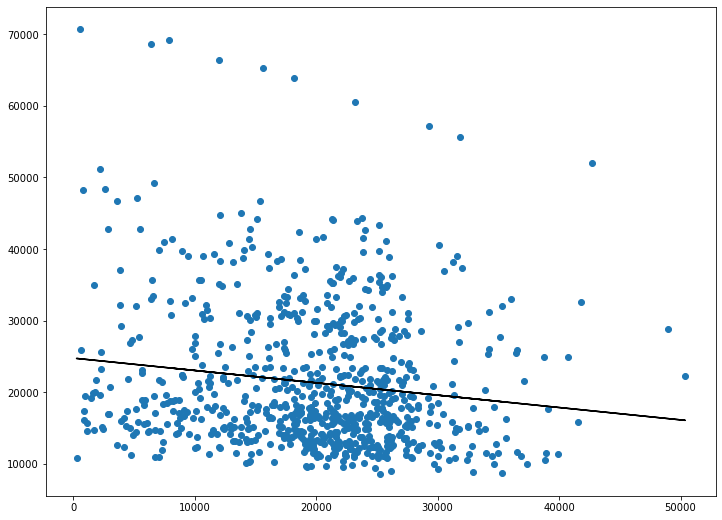

In [16]:
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

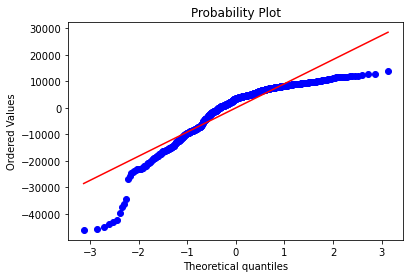

In [20]:
# Мы видим, что модель ошибается
#Посмтроим разницу остатков между предсказанным значением и истинным значением

import pylab
import scipy.stats as stats

stats.probplot(x= (y_predict - Y), dist = "norm", plot = pylab)
pylab.show()

'''
Мы видим, что наши остатки не соответствуют нормальным. Красная линия это то, как бы располагалсь разница, 
если бы это были нормальные данные. Синие данные это наши данные как есть. 
Наша модель очень слаба и много не учла

'''

<p>Несмотря на то, что зависимость от пробега наблюдаема, но она не столь существенна, чтобы эффективно описать данные, как видим на графике. Нужно что-то поумнее.</p>

In [25]:
# будем использовать набор данных, а не только пробег. Добавим признаки и усилим модель
"""
Make - это кто сделал, категория, а литры и мили значения. Ф-я get_dummies помогает категорию разделить на столбцы.
Теперь если есть такая категория, то будет 1, нет - 0. 
Новые колонки позволяет работать с данными и запихнуть в модель
"""

X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', "Make"]])
X.head()



,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,3.1,1,0,0,0,0,0
1,9135,3.1,1,0,0,0,0,0
2,13196,3.1,1,0,0,0,0,0
3,16342,3.1,1,0,0,0,0,0
4,19832,3.1,1,0,0,0,0,0


In [26]:
Y = data.loc[:, ['Price']]
Y.head() # предсказываемая цена

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [27]:
model.fit(X, Y) # переобучим модель и передадим новые значения X Y
y_predict = model.predict(X) # обучаем регрессию

<p>Попробуем нарисовать как расходится факт с предсказаниями.</p>

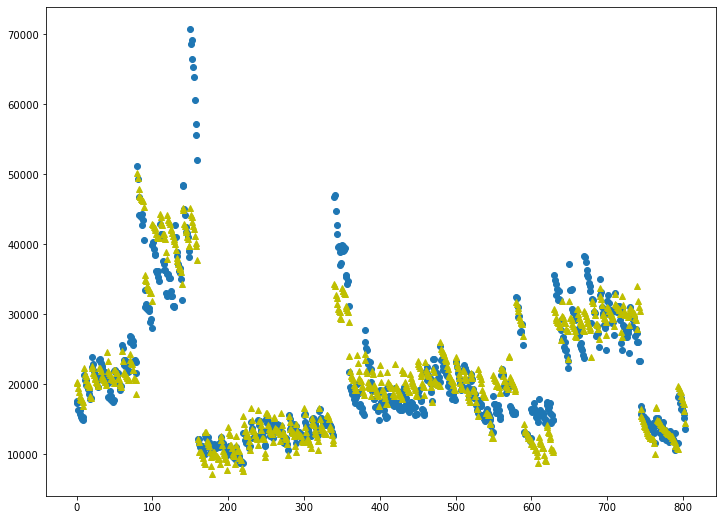

In [28]:
"""
Получаем, что по горизонтали машины (800 штук)
и каждой машине будет соответствовать две точки
Синяя точка это реальное значение цены
желтая точка предсказанное значение цены
Модель видим хорошо предсказывает 

"""

plt.figure(figsize=(12,9))
plt.plot(Y.index, Y, 'o')
plt.plot(Y.index, y_predict, 'y^')
plt.show() # видим как цена действительно накладывается на истину

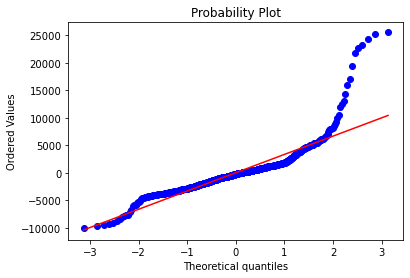

In [32]:
"""
Модель хорошо предсказывает цены от -3 до 2
В области низких цен и средних цен
в области высоких цен есть ошибки, не описывается линейной моделью
Можно усилить или отдельную модель для высоких цен - и ошибка станет близко к нормальной
"""

import pylab
import scipy.stats as stats

del_y = Y.to_numpy() - y_predict

stats.probplot(del_y.reshape(-1), dist = "norm", plot = pylab)
pylab.show()


<h2>Полиномиальная регрессия</h2>
<p id="4">Не всегда данные могут быть описаны (достаточно эффективно) линейной моделью. В некоторых задачах часто строятся полиномиальные модели. Здесь появляется дополнительный гиперпараметр - максимальная степень, в  которой могут находится параметры для описанния данных. Хороший пример как работает полиномиальная и линейная регрессия на нелинейных данных.</p>
<p><img src="https://miro.medium.com/proxy/1*QKcwvXU0UZ9YtkmRNKBM3w.gif"><img src="https://miro.medium.com/proxy/1*34dYVwi1ieVQBtwKd4xReg.gif"></p>

<h3>Практика на собственном датасете.</h3><p id="5">Сгенерируем свой собственный датасет для задачи полиномиальной регрессии.</p>

In [33]:
#Для полиноминальной регресии нет отдельного класса модели 
#Есть специальный объект, который производит полиноминальные признаки PolynomialFeatures
# PolynomialFeatures берет все наши признаки и перемножает друг с другом (как декартово). 
#Когда собираемся использовать PolynomialFeatures, мы должна задаем степень полиноминола

from sklearn.metrics import mean_squared_error, r2_score # подгружаем метрику mse и r2
from sklearn.preprocessing import PolynomialFeatures


In [35]:
"""
Сделаем сложную зависимость между Х и Y 
np.random.normal нормально распределенный шум

"""

np.random.seed(0)
x = 2- 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20) # заданы параметры при степенях

# преобразуем данный чтобы добавить новые оси
x = x[:, np.newaxis]
y = y[:, np.newaxis]

MSE: 15.908242501429998
R2: 0.6386750054827146


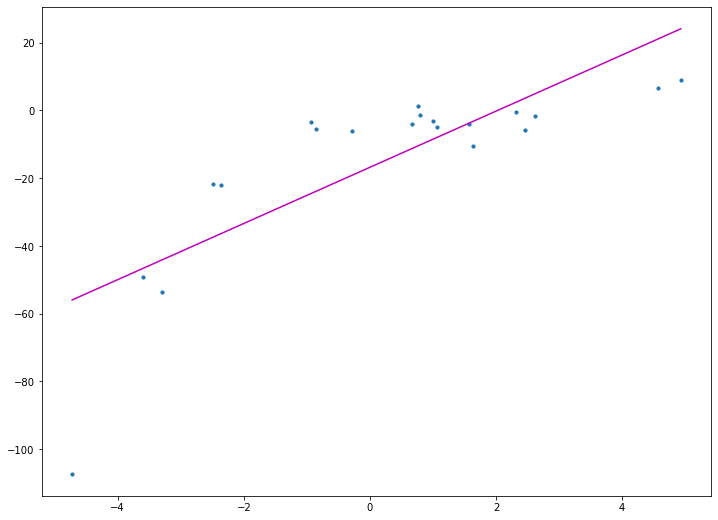

In [36]:
model = LinearRegression() 
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(12,9))

# считаем метрику MSE и R2
rmse = np.sqrt(mean_squared_error(y, y_pred)) #считаем среднеквадратичную ошибку
r2 = r2_score(y, y_pred) #r2_score посчитаем коэффициент детерминации (насколько наша модель смогла объяснить дисперсию данных)
# Итоговый размах ошибки. Чем она меньше, тем больше дисперсию данных наша модель смогла  объянсить 
# Значение у r2_score мин 0 и макс 1. 0 плохо, 1 хорошо
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(x, y, s=10)

# рисуем наши смоделированные данные
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x_, y_pred = zip(*sorted_zip)

plt.plot(x_, y_pred, color='m')
plt.show()

<p>Видим, что линейная модель описывает наши данные не очень хорошо. Это можно понять и по MSE, R2, и исходя из графика. Попробуем построить полиномиальную регрессию.</p>

In [ ]:
# sklearn генерирует допольнительное кол-во признаков для полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=2) # Создаем новый объем и указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x) # получаем новые признаки. С помощью нашего нового объекта обучаем и 
#одновременно трансформируем наши данные. 
# То есть мы передаем сюда данные Х, а возвращает новые данные Х, которые уже прошли полиномиальные преобразования

MSE: 10.120437473614711
R2: 0.8537647164420812


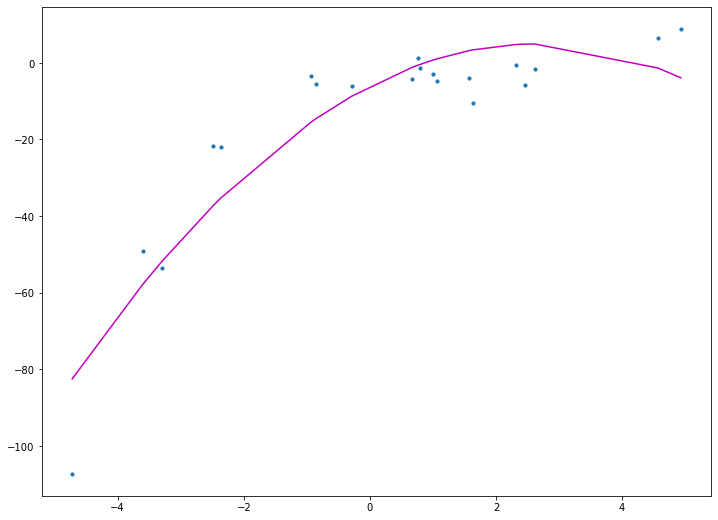

In [ ]:
# теперь подаем эти признаки в линейную регресиию
# и проделаем все те же самые операции
# То есть на новых полиномиальных данных строим нашу модель 
model = LinearRegression() 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))


rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

<p>Проделаем то же самое, например, для 3 степени.</p>

MSE: 3.449895507408724
R2: 0.9830071790386679


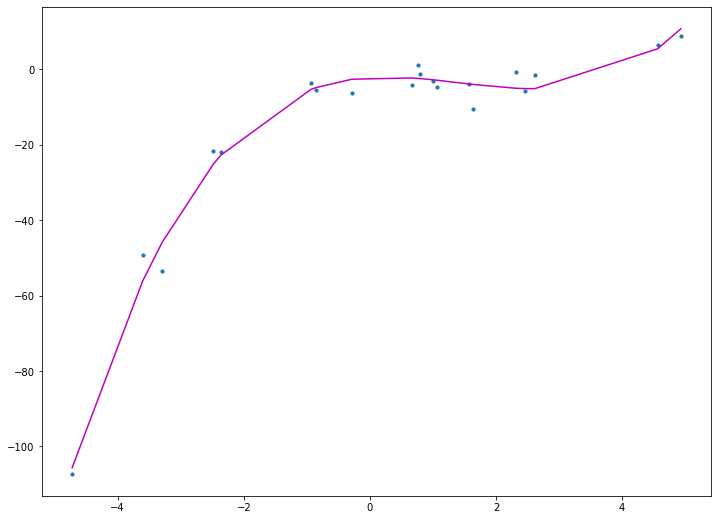

In [ ]:
polynomial_features = PolynomialFeatures(degree=3) # ставим новую степень и создаем новые данные 
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression() 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))


rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2) # коэффициент детерминации
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

In [ ]:
Коэф детерминации 0,98 (то есть практически полностью объяснили наши данные) и MSE упал сильно. Очень хороший показатель 

<p>Видим что, с увелечением степени MSE и R2 упали до приемлемых значений, и наша модель достаточно хорошо описывается 3 степенью. Но стоит помнить, что чем больше мы задаем степень полинома, тем точнее полином будет накладываться на значения и модель будет переобучаться, поэтому с этим нужно быть осторожным. О переобучении речь будет идти в сл. уроках.</p>

<h2>Summary</h2>
<ol><li>Линейная регрессия лежит в основе многих сложных моделей, она позволяет очень эффективно предсказываать <b>общий тренд</b> данных, но также имеет и довольно <b>большие ограничения</b> на исследуемый датасет.</li><li>Полиномиальная регрессия умеет описывать <b>более сложные кривые</b> данных, которые не может описать линейная. <b>В зависимости от степени</b> полином будет описывать все точнее и точнее рассматриваемые данные, но не стоит забывать про <b>переобучение</b>.</li></ol>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>При каких условиях актуален и эффективен алгоритм линейной регрессии? Какие требования должны накладываться на данные?</li><li>Как влияет степень полинома на описание данных полиномиальной регрессией? </li></ol></p>

<h1>Спасибо за внимание!</h1>

In [ ]:
#Пример с обучением и тестом

In [40]:
np.random.seed(0)
x = 2- 3 * np.random.normal(0, 1, 40)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 40) # заданы параметры при степенях

# преобразуем данный чтобы добавить новые оси
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

MSE train:, 35.07307351863653 MSE test: 26.40667045411129
R2 train:, 0.6864705101077517 MSE test: -1.4383168030428415


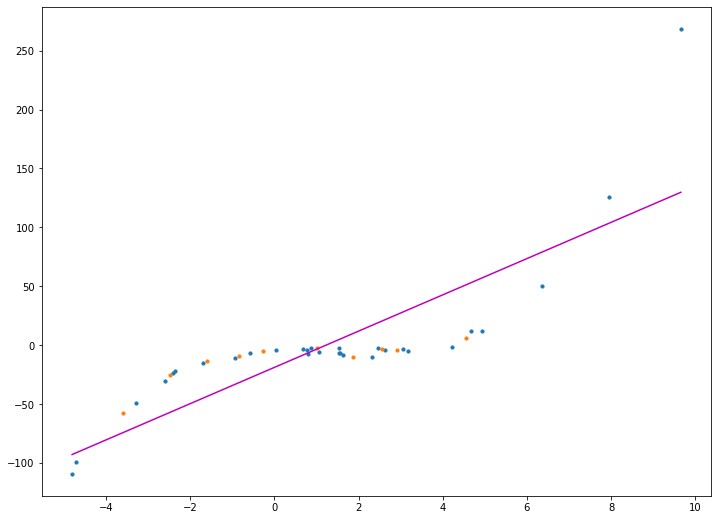

In [44]:


model = LinearRegression() 
model.fit(x_train, y_train)

y_pred_tr = model.predict(x_train)
y_pred_ts = model.predict(x_test)

plt.figure(figsize=(12,9))


rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
rmse_ts = np.sqrt(mean_squared_error(y_test, y_pred_ts))

r2_tr = r2_score(y_train, y_pred_tr)
r2_ts = r2_score(y_test, y_pred_ts)

print(f'MSE train:, {rmse_tr} MSE test: {rmse_ts}')
print(f'R2 train:, {r2_tr} MSE test: {r2_ts}') 
plt.scatter(x_train, y_train, s=10)
plt.scatter(x_test, y_test, s=10)


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred_tr), key=sort_axis)
x_, y_pred_tr = zip(*sorted_zip)

plt.plot(x_, y_pred_tr, color='m')
plt.show()

MSE train:, 28.713850478334077 MSE test: 22.676525365398277
R2 train:, 0.7898576358772353 MSE test: -0.7981083607477071


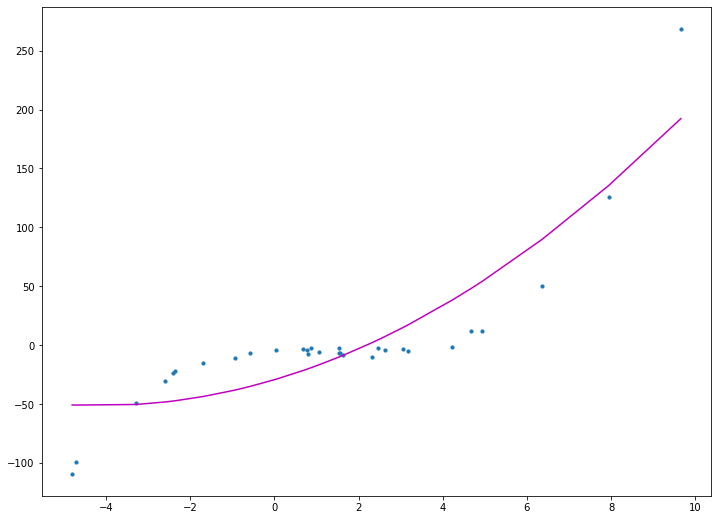

In [48]:
polynomial_features = PolynomialFeatures(degree=2) # Создаем новый объем и указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x_train)
x_ts_p = polynomial_features.transform(x_test)


model = LinearRegression() 
model.fit(x_poly, y_train)



y_pred_tr = model.predict(x_poly)
y_pred_ts = model.predict(x_ts_p)

plt.figure(figsize=(12,9))

rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
rmse_ts = np.sqrt(mean_squared_error(y_test, y_pred_ts))

r2_tr = r2_score(y_train, y_pred_tr)
r2_ts = r2_score(y_test, y_pred_ts)

print(f'MSE train:, {rmse_tr} MSE test: {rmse_ts}')
print(f'R2 train:, {r2_tr} MSE test: {r2_ts}') 
plt.scatter(x_train, y_train, s=10)



sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred_tr), key=sort_axis)
x_, y_pred_tr = zip(*sorted_zip)

plt.plot(x_, y_pred_tr, color='m')
plt.show()


MSE train:, 3.2335549923731968 MSE test: 37.339833874260115
R2 train:, 0.9973350366098173 MSE test: -3.875370252212818


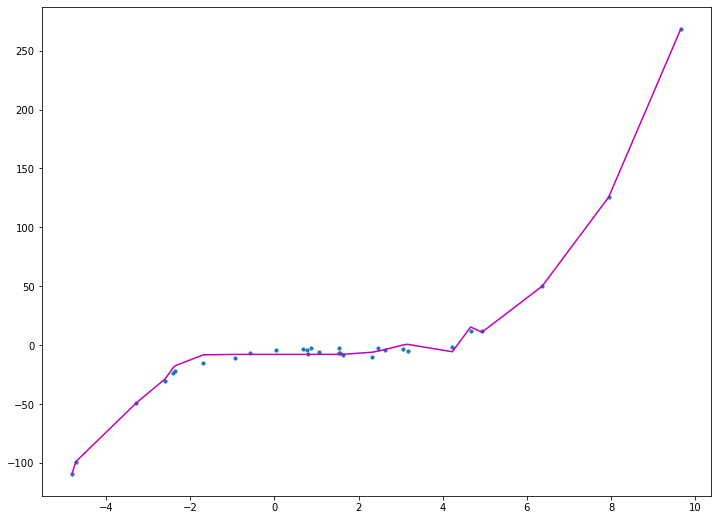

In [54]:
polynomial_features = PolynomialFeatures(degree=20) # Создаем новый объем и указываем 20 степень полинома
x_poly = polynomial_features.fit_transform(x_train)
x_ts_p = polynomial_features.transform(x_test)


model = LinearRegression() 
model.fit(x_poly, y_train)



y_pred_tr = model.predict(x_poly)
y_pred_ts = model.predict(x_ts_p)

plt.figure(figsize=(12,9))

rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
rmse_ts = np.sqrt(mean_squared_error(y_test, y_pred_ts))

r2_tr = r2_score(y_train, y_pred_tr)
r2_ts = r2_score(y_test, y_pred_ts)

print(f'MSE train:, {rmse_tr} MSE test: {rmse_ts}')
print(f'R2 train:, {r2_tr} MSE test: {r2_ts}') 
plt.scatter(x_train, y_train, s=10)



sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred_tr), key=sort_axis)
x_, y_pred_tr = zip(*sorted_zip)

plt.plot(x_, y_pred_tr, color='m')
plt.show()

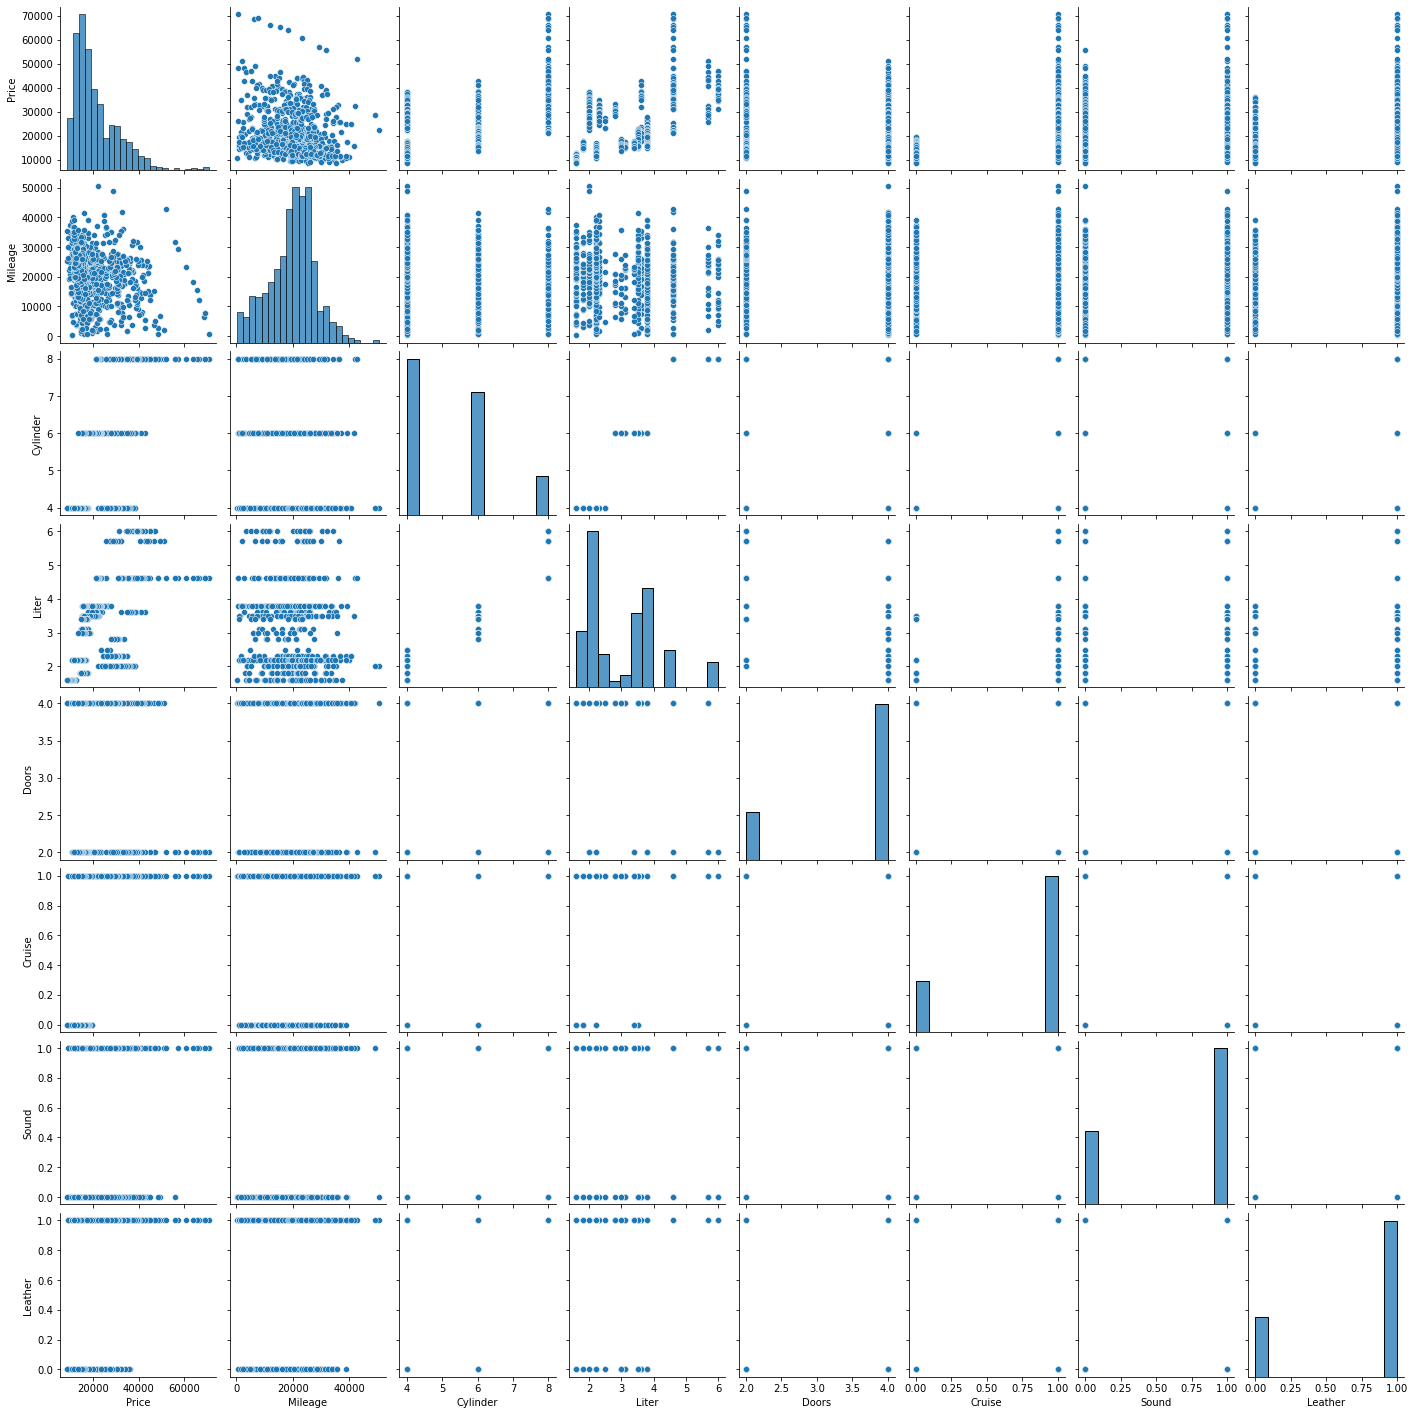

In [55]:
import seaborn as sns
sns.pairplot(data)